![Prodigy_ML/image.png](image.png)

---
# K-Means Clustering on Retail Store Customer Data

This project demonstrates how to perform K-means clustering on customer data from a retail store. The goal is to group customers based on their purchase history, using their annual income and spending score as features.

---

---
## Dataset

The dataset used in this project is `Mall_Customers.csv`, which contains the following columns:
- `CustomerID`: Unique identifier for each customer.
- `Gender`: Gender of the customer.
- `Age`: Age of the customer.
- `Annual Income (k$)`: Annual income of the customer in thousands of dollars.
- `Spending Score (1-100)`: Score assigned by the store based on customer behavior and spending nature.

---

---
## Steps

1. **Data Loading and Inspection**:
    - Load the dataset and inspect the first few rows.
    - Check for null values and display basic statistics of the dataset.
<br><br>
2. **Data Visualization**:
    - Visualize the distribution of Age, Annual Income, and Spending Score using histograms.
<br><br>
3. **Data Preprocessing**:
    - Select the features for clustering: `Annual Income (k$)` and `Spending Score (1-100)`.
    - Standardize the features using `StandardScaler`.
<br><br>
4. **Finding the Optimal Number of Clusters**:
    - Use the elbow method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different numbers of clusters.
<br><br>
5. **Applying K-Means Clustering**:
    - Fit the K-means algorithm to the data with the optimal number of clusters.
    - Add the cluster labels to the original dataset.
<br><br>
6. **Visualization of Clusters**:
    - Visualize the clusters using a scatter plot, with cluster centroids marked in red.
<br><br>
7. **Saving the Clustered Data**:
    - Save the clustered data to a new CSV file, `new_Mall_Customers_Clustered.csv`.
---

---
## Requirements

1. **pandas:** For data manipulation and analysis.<br><br>
2. **seaborn:** For statistical data visualization.<br><br>
3. **matplotlib:** For plotting graphs.<br><br>
4. **sklearn.cluster.KMeans:** For K-means clustering.<br><br>
5. **sklearn.preprocessing.StandardScaler:** For feature scaling.
---

---
## Usage

1. **Run the script:**

   - Execute the script to perform clustering on the Mall Customers dataset.

2. **View the Output:**

   - The output will include visualizations of the distributions and clusters, and the clustered data will be saved to a new CSV file named new_Mall_Customers_Clustered.csv.
---

---
# Task-02 
## Create a K-means clustering algorithm to group customers of a retail store based on their purchase history
---

## Import necessary Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [130]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Renaming Columns for Clarity

In [136]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

### Check for null values

In [140]:
# Check for null values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Display basic statistics of the dataset

In [143]:
# Display basic statistics of the dataset
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


### Basic Data Information

In [148]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visualization
## Histogram of Annual Income


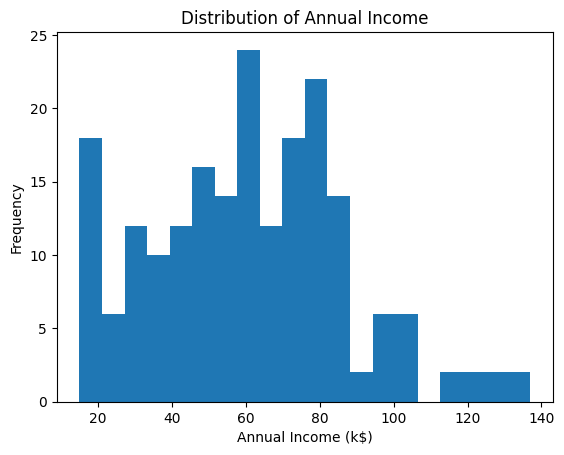

In [151]:
plt.hist(df['Annual Income (k$)'], bins=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

# Histogram of Spending Score

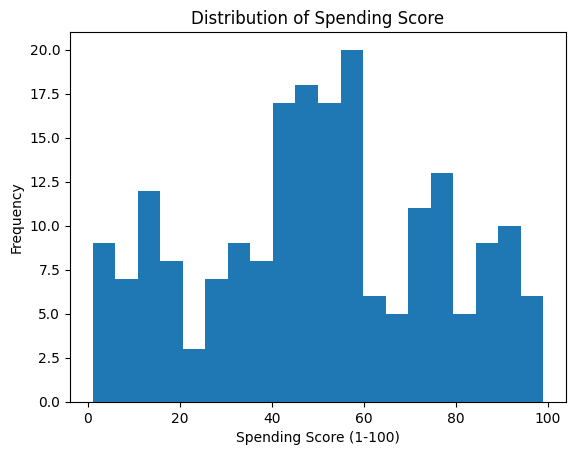

In [154]:
plt.hist(df['Spending Score (1-100)'], bins=20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score')
plt.show()

# Count Plot of Gender

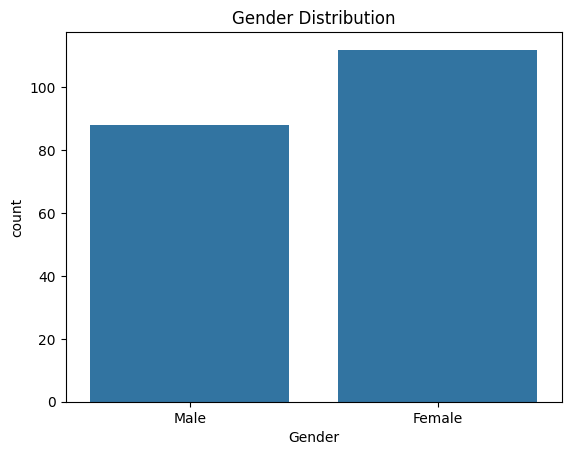

In [157]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Correlation Matrix

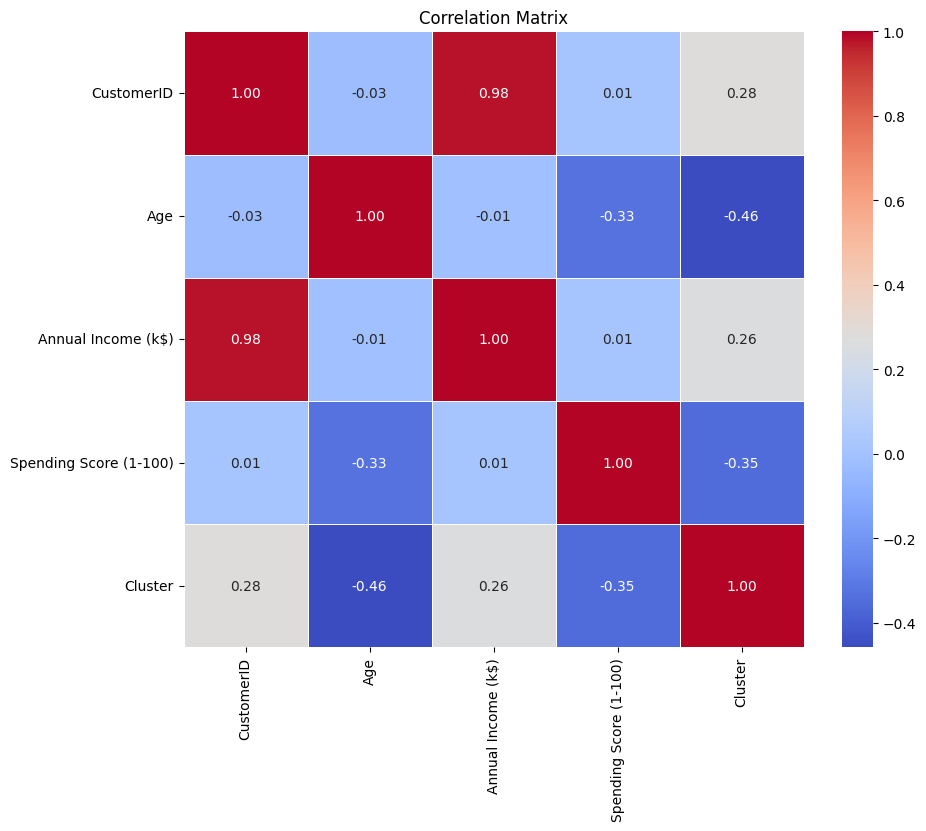

In [180]:
# Dropping the non-numeric 'Gender' column for correlation matrix calculation
df_numeric = df.drop(columns=['Gender'])

# Calculating the correlation matrix
corr = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Standardizing the Data

In [184]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Finding Optimal Number of Clusters using Elbow Method

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

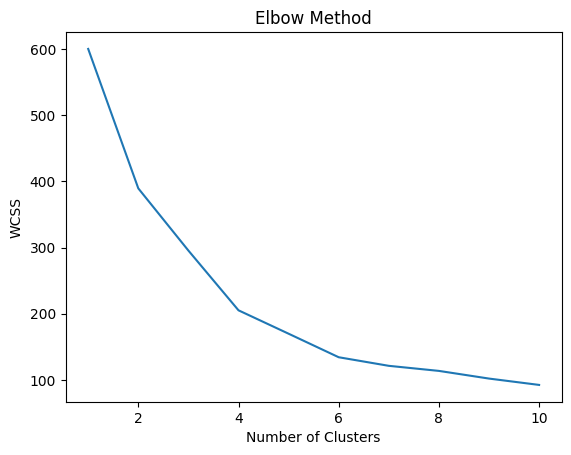

In [187]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# K-Means Clustering

In [190]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize the clusters

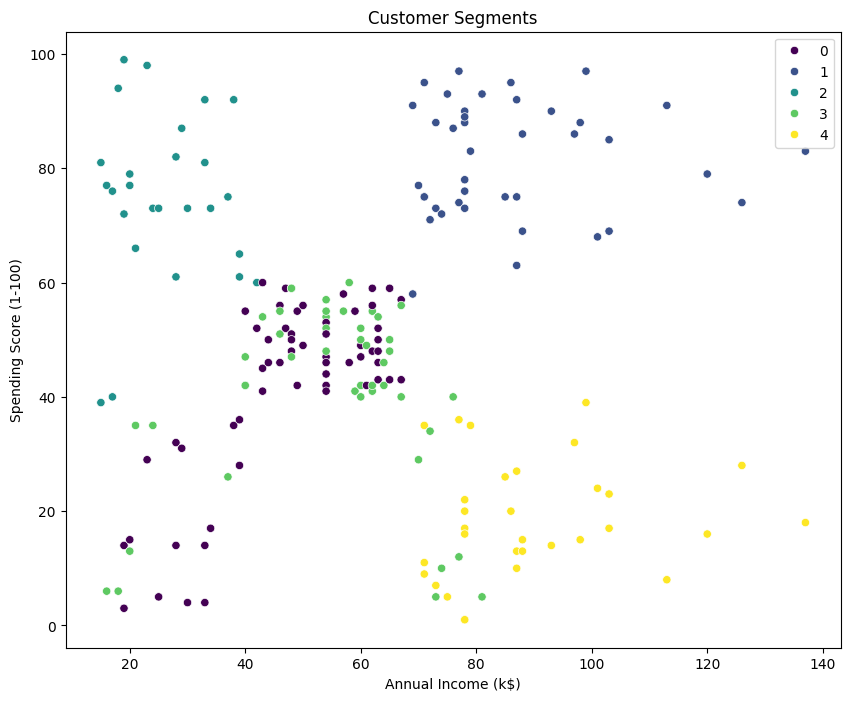

In [193]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Generate New Dataset 

In [196]:
# Save the clustered data to a new CSV file
output_path = 'new_Mall_Customers_Clustered.csv'
df.to_csv(output_path, index=False)
print(f'Clustered data saved to {output_path}')

Clustered data saved to new_Mall_Customers_Clustered.csv


In [198]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
154,155,1,47,78,16,4
47,48,1,27,40,47,3
178,179,0,59,93,14,4
37,38,1,30,34,73,2
111,112,1,19,63,54,3


# Conclusion

- This project demonstrates how to perform K-means clustering on customer data to identify distinct groups based on their annual income and spending score. The resulting clusters can be used for targeted marketing and personalized customer experiences.

![Prodigy_ML/khush.png](khush.png)